In [2]:
import tensorflow as tf
import keras
import keras.utils
from keras import layers
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
filepath=r'C:\major\Breast-cancer-segmentation-using-Attention-Unet\normalized'
training_datasets=keras.utils.image_dataset_from_directory(filepath,validation_split=0.2,subset='training',image_size=(256,256),seed=123,batch_size=10)
validation_dataset=keras.utils.image_dataset_from_directory(filepath,validation_split=0.2,subset='validation',image_size=(256,256),seed=123,batch_size=10)

Found 780 files belonging to 3 classes.
Using 624 files for training.
Found 780 files belonging to 3 classes.
Using 156 files for validation.


In [6]:
class_names = training_datasets.class_names
print(class_names)
num_classes = len(class_names)

['benign', 'malignant', 'normal']


In [49]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [50]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                

In [52]:
cb=[
    ModelCheckpoint('C:\major\Breast-cancer-segmentation-using-Attention-Unet\classification.keras',save_best_only=True)]

In [53]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:

history = model.fit(
  training_datasets,
  validation_data=validation_dataset,
  epochs=20,
  callbacks=cb
)


Epoch 1/20


63/63 [==============================] - 77s 1s/step - loss: 1.1022 - accuracy: 0.5401 - val_loss: 0.9098 - val_accuracy: 0.6410
Epoch 2/20
63/63 [==============================] - 71s 1s/step - loss: 1.0551 - accuracy: 0.5689 - val_loss: 1.0572 - val_accuracy: 0.4038
Epoch 3/20
63/63 [==============================] - 73s 1s/step - loss: 0.9182 - accuracy: 0.5865 - val_loss: 0.7699 - val_accuracy: 0.6410
Epoch 4/20
63/63 [==============================] - 70s 1s/step - loss: 0.9337 - accuracy: 0.6010 - val_loss: 0.8028 - val_accuracy: 0.6538
Epoch 5/20
63/63 [==============================] - 70s 1s/step - loss: 0.8108 - accuracy: 0.6490 - val_loss: 0.7776 - val_accuracy: 0.6538
Epoch 6/20
63/63 [==============================] - 75s 1s/step - loss: 0.8708 - accuracy: 0.6506 - val_loss: 0.7118 - val_accuracy: 0.7308
Epoch 7/20
63/63 [==============================] - 83s 1s/step - loss: 0.7978 - accuracy: 0.6490 - val_loss: 0.7057 - val_accuracy: 0.6859
Epoch 8/20
63/63 [=============

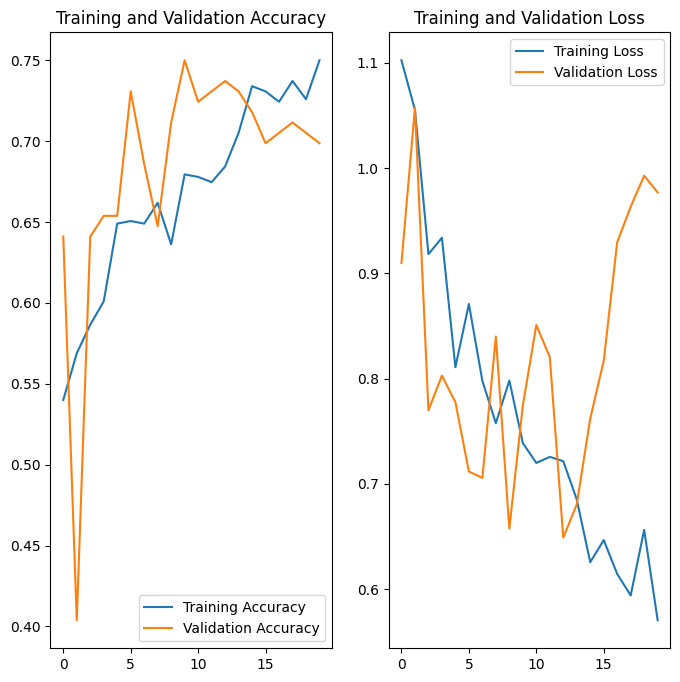

In [56]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()